# Initial Data Load and Overview

## Imports

In [14]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [4]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, '../data')

In [10]:
data = pd.read_excel(os.path.join(data_dir, 'external/antibody_info.xlsx'), header=1)
display(data)

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


## Countplots

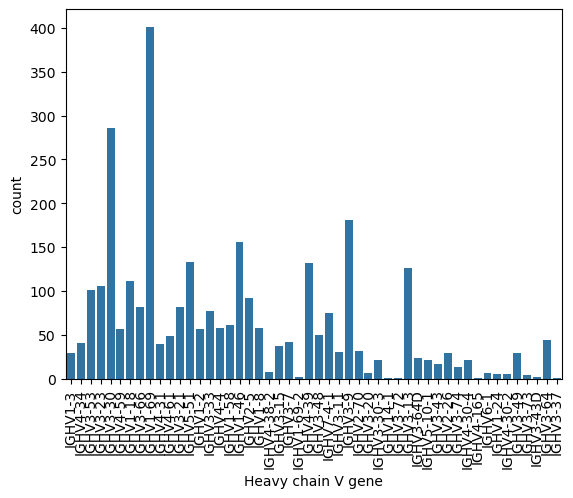

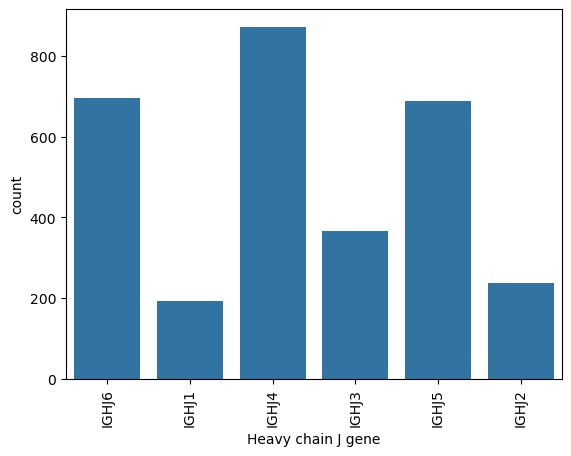

In [19]:
sns.countplot(data=data, x='Heavy chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Heavy chain J gene')
plt.xticks(rotation=90)
plt.show()

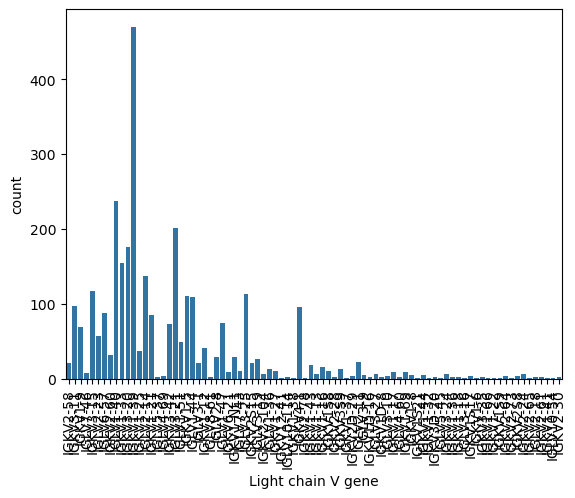

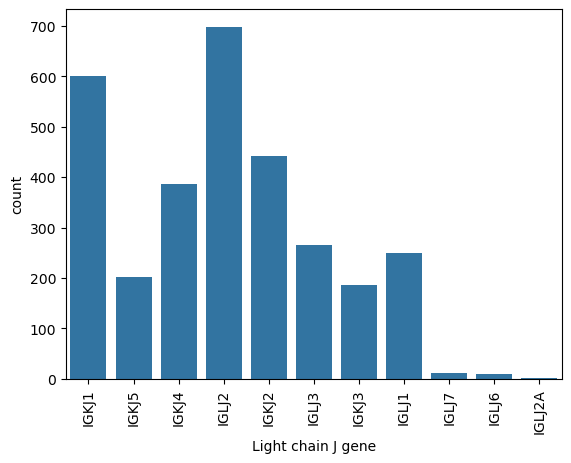

In [20]:
sns.countplot(data=data, x='Light chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Light chain J gene')
plt.xticks(rotation=90)
plt.show()

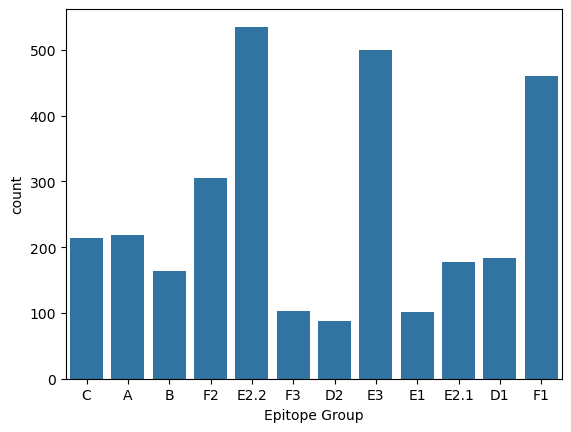

In [15]:
sns.countplot(data=data, x='Epitope Group')
plt.show()

## Simple PCA

Blosum encode sequences:

In [49]:
from Bio.Align import substitution_matrices
matrix = substitution_matrices.load("BLOSUM62")
def blosum_encode(seq):
    encoding = []
    for pos, res in enumerate(list(seq)):
        index = matrix.alphabet.index(res)
        v = matrix[index, :]
        encoding.append(v)
    encoding = np.concatenate(encoding)
    return encoding
    

In [53]:
hc_encodings = []
max_l = data['Heavy chain AA'].str.len().max()
for vh_seq in data['Heavy chain AA'].values:
    hc_encodings.append(blosum_encode(vh_seq))

In [54]:
max_l

np.int64(136)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_coords = pca.fit_transform(hc_encodings)
plt.scatter(x_coords[:, 0], x_coords[:, 1])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3051,) + inhomogeneous part.

In [52]:
hc_encodings

[array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(3048,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2904,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2832,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2928,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2928,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2952,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2832,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2880,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(3000,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2808,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2976,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2784,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2808,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2976,)),
 array([-1.,  0.,  0., ...,  0.,  0., -4.], shape=(2976,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4.], shape=(2904,)),
 array([-1.,  1.,  0., ...,  0.,  0., -4